In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1   2/5/2010      24924.50      False
1      1     1  2/12/2010      46039.49       True
2      1     1  2/19/2010      41595.55      False
3      1     1  2/26/2010      19403.54      False
4      1     1   3/5/2010      21827.90      False

In [6]:
test_df.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [9]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [10]:
features_df = pd.read_csv('features.csv')

In [11]:
stores_df = pd.read_csv('stores.csv')

In [12]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [13]:
features_df['Date'] = pd.to_datetime(features_df['Date'])

In [14]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [15]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB


In [16]:
#Merge train_df and features_df
train_new = pd.merge(train_df,features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

In [17]:
train_new.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106

In [18]:
train_new = pd.merge(train_new, stores_df, on='Store', how='left')

In [19]:
train_new.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [20]:
train_new['Year'] = train_new['Date'].dt.year

In [21]:
train_new['Month'] = train_new['Date'].dt.month

In [22]:
train_new.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  Year  Month  
0         8.106    A  151315  2010      2  
1         8.106    A  151315  2010      2  
2         8.106    A  151315  2010      2  
3         8.106    A  151315  2010      2  
4         8.106    A  151315  2010      3

In [23]:
def log_transform_WeeklySales(col):
    Weekly_Sales = col[0]
    
    if Weekly_Sales <= 0:
        return 0
    else:
        return np.log(Weekly_Sales)


In [24]:
#Log transform Weekly sales
train_new['Log_WeeklySales'] = train_new[['Weekly_Sales']].apply(log_transform_WeeklySales,axis=1)

In [25]:
train_new.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  Year  Month  Log_WeeklySales  
0         8.106    A  151315  2010      2        10.123607  
1         8.106    A  151315  2010      2        10.737255  
2         8.106    A  151315  2010      2        10.635748  
3         8.106    A  151315  2010      2         9.873211  
4         8.106    A  151315  2010      3         9.990944

In [26]:
#Function to have a temperature band
def temperature_band(col): 
    Temperature = col[0]
    if (Temperature < 0):
        return 'Less than 0'
    elif (Temperature >= 0) & (Temperature < 20):
        return 'Less than 20'
    elif (Temperature >= 20) & (Temperature < 40):
        return 'Less than 40'
    elif (Temperature >= 40) & (Temperature < 60):
        return 'Less than 60'
    elif (Temperature >= 60) & (Temperature < 70):
        return 'Less than 70'
    elif (Temperature >= 70) & (Temperature < 80):
        return 'Less than 80'
    else:
        return 'Greater than 80'
    

In [27]:
train_new['Temperature Band'] = train_new[['Temperature']].apply(temperature_band,axis=1)

In [28]:
train_new.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  Year  Month  Log_WeeklySales Temperature Band  
0         8.106    A  151315  2010      2        10.123607     Less than 60  
1         8.106    A  151315  2010      2        10.737255     Less than 40  
2         8.106    A  151315  2010      2        10.635748     Less than 40  
3         8.106    A  151315  2010      2         9.873211     Less than 60  
4         8.106    A  151315  2010      3         9.990944     Less than 60

In [29]:
#Function to have a CPI range
def CPI_RANGE(col): 
    CPI = col[0]
    if (CPI >= 125) &(CPI < 130):
        return 'Less than 130'
    elif (CPI >= 130) & (CPI < 135):
        return 'Between 130 and 135'
    elif (CPI >= 135) & (CPI < 140):
        return 'Between 135 and 140'
    elif (CPI >= 140) & (CPI < 145):
        return 'Between 140 and 145'
    elif (CPI >= 145) & (CPI < 190):
        return 'Between 145 and 190'
    elif (CPI >= 190) & (CPI < 210):
        return 'Between 190 and 210'
    elif (CPI >= 210) & (CPI < 230):
        return 'Between 210 and 230'


In [30]:
train_new['CPI_Range'] = train_new[['CPI']].apply(CPI_RANGE,axis=1)

In [31]:
train_new.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3         ...           MarkDown5  \
0        NaN        NaN        NaN         ...                 NaN   
1        NaN        NaN        NaN         ...                 NaN   
2        NaN        NaN        NaN         ...                 NaN   
3        NaN        NaN        NaN         ...                 NaN   
4        NaN        NaN        NaN         ...                 NaN   

          CPI  Unemployment  Type    Size  Year  Month  Log_WeeklySales  \
0  211.096358         8.106     A  151315  2010      2        10.123607   
1  211.242170         8.106     A  151315  2010      2        10.737255   
2  211.289143         8.106     A  151315  2010      2        10.635748   
3  211.319643         8.106     A  151315  2010      2         9.873211   
4  211.350143         8.106     A  151315  2010      3         9.990944   

   Temperature Band            CPI_Range  
0      Less than 60  Between 210 and 230  
1      Less than 40  Between 210 and 230  
2      Less than 40  Between 210 and 230  
3      Less than 60  Between 210 and 230  
4      Less than 60  Between 210 and 230  

[5 rows x 21 columns]

In [32]:
train_new['MarkDown1'].isnull().sum()

270889

In [33]:
train_new['MarkDown2'].isnull().sum()

310322

In [34]:
train_new['MarkDown3'].isnull().sum()

284479

In [35]:
train_new['MarkDown4'].isnull().sum()

286603

In [36]:
train_new['MarkDown5'].isnull().sum()

270138

In [37]:
train_new.describe()

Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.270000      41.600000       5.080000   
50%         3.452000    5347.450000     192.000000      24.600000   
75%         3.738000    9210.900000    1926.940000     103.990000   
max         4.468000   88646.760000  104519.540000  141630.610000   

           MarkDown4      MarkDown5            CPI   Unemployment  \
count  134967.000000  151432.000000  421570.000000  421570.000000   
mean     3383.168256    4628.975079     171.201947       7.960289   
std      6292.384031    5962.887455      39.159276       1.863296   
min         0.220000     135.160000     126.064000       3.879000   
25%       504.220000    1878.440000     132.022667       6.891000   
50%      1481.310000    3359.450000     182.318780       7.866000   
75%      3595.040000    5563.800000     212.416993       8.572000   
max     67474.850000  108519.280000     227.232807      14.313000   

                Size           Year          Month  Log_WeeklySales  
count  421570.000000  421570.000000  421570.000000    421570.000000  
mean   136727.915739    2010.968591       6.449510         8.493367  
std     60980.583328       0.796876       3.243217         2.101915  
min     34875.000000    2010.000000       1.000000        -4.605170  
25%     93638.000000    2010.000000       4.000000         7.639955  
50%    140167.000000    2011.000000       6.000000         8.937485  
75%    202505.000000    2012.000000       9.000000         9.913728  
max    219622.000000    2012.000000      12.000000        13.448929

In [38]:
train_new['Store'].nunique() ## Number of unique stores

45

In [39]:
train_new['Dept'].nunique() ## Count of Depts

81

In [40]:
train_new['Year'].value_counts() #number of records in each year. Here it can be seen that 2011 has more data than the others

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [41]:
train_new['Store'].value_counts() #record count by stores

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Store, dtype: int64

In [42]:
train_new['Dept'].value_counts()

1     6435
10    6435
38    6435
21    6435
67    6435
16    6435
14    6435
13    6435
79    6435
81    6435
46    6435
82    6435
8     6435
90    6435
91    6435
92    6435
7     6435
4     6435
95    6435
3     6435
2     6435
40    6435
11    6434
74    6430
17    6412
12    6409
42    6401
87    6391
9     6354
25    6354
      ... 
55    5596
22    5543
44    5471
24    5406
41    5393
33    5390
34    5326
71    5309
29    5308
35    5297
36    5295
30    5291
18    5029
96    4854
54    4767
49    4482
58    4390
19    4119
37    2577
45    1936
48    1742
50    1562
51    1394
99     862
47     646
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

#### Data Visualization

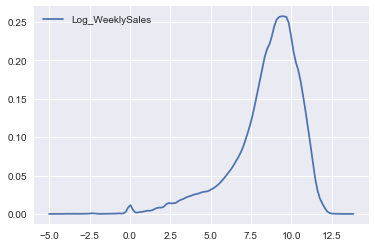

In [44]:
sns.kdeplot(train_new['Log_WeeklySales'])

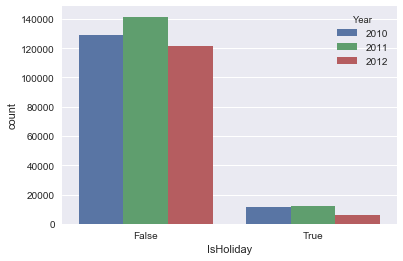

In [45]:
sns.countplot(x='IsHoliday',hue='Year',data=train_new)

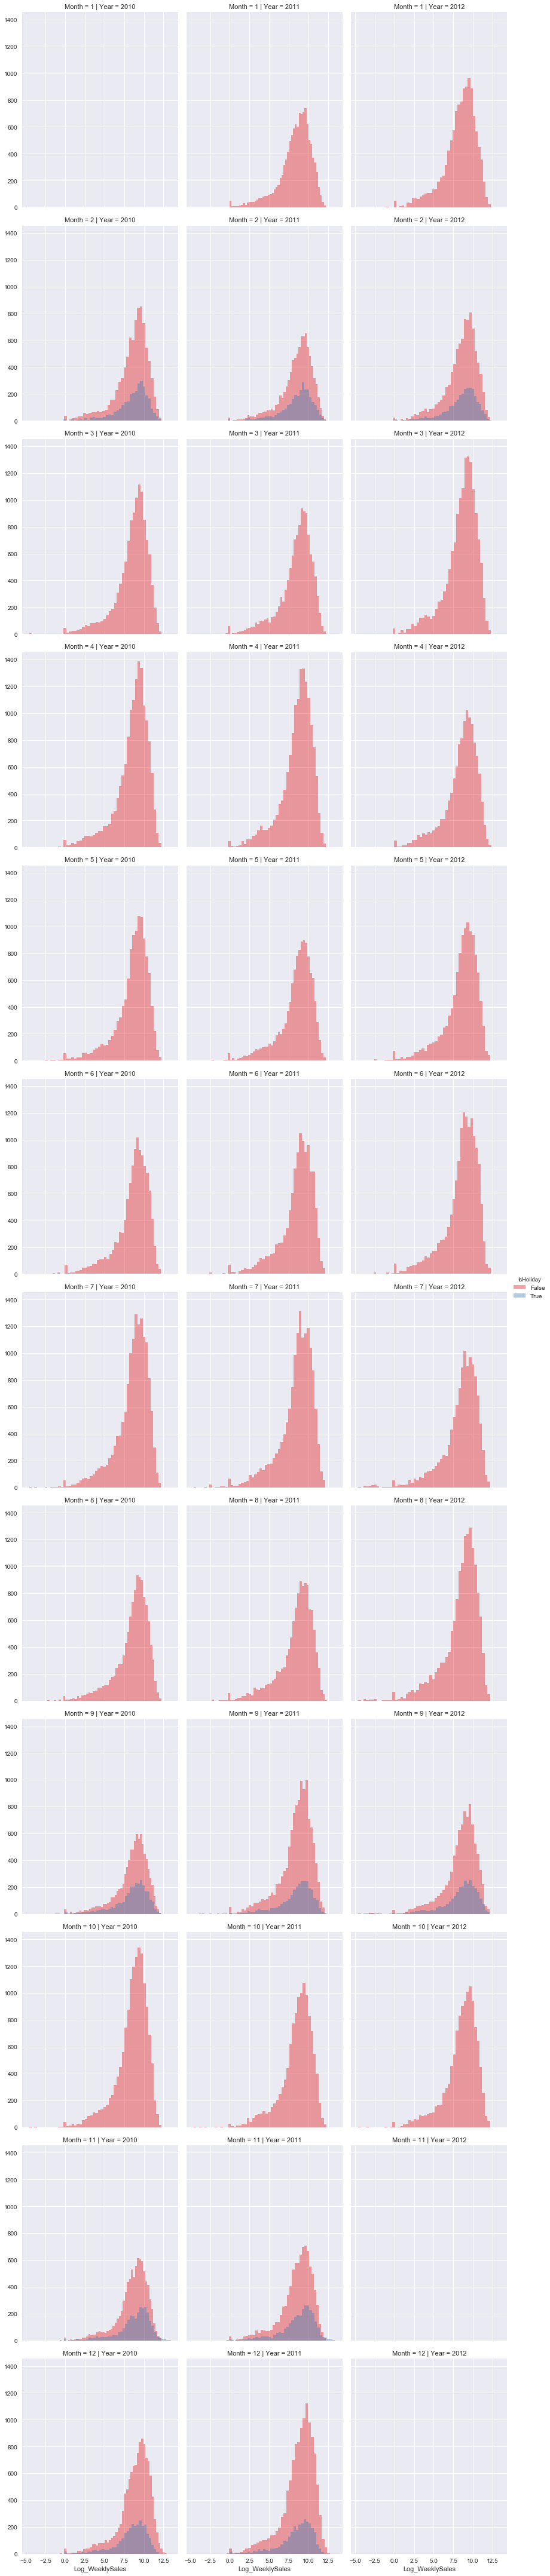

In [46]:
###Sales for all stores across all 3 years - monthwise, with isholiday flag.
g = sns.FacetGrid(train_new,col='Year',row='Month',hue='IsHoliday',size=5,sharex=True,aspect=0.8,palette='Set1')
g.map(sns.distplot,'Log_WeeklySales',kde=False)
g.add_legend()

In [47]:
train_new.describe(include=['O'])

Type Temperature Band            CPI_Range
count   421570           421570               421570
unique       3                7                    7
top          A     Less than 60  Between 210 and 230
freq    215478           128856               134809

In [48]:
str_sales = train_new.groupby(['Store', 'Year'])[['Log_WeeklySales']].sum()

In [49]:
str_sales.shape

(135, 1)

In [50]:
str_sales.head()

Log_WeeklySales
Store Year                 
1     2010     31122.525798
      2011     33617.079632
      2012     27690.161450
2     2010     32153.892491
      2011     34684.739979

In [51]:
## Top 5 selling stores:

max_sales = str_sales['Log_WeeklySales'].max()
print(max_sales)

str_sales[str_sales['Log_WeeklySales']>= (max_sales-10000)].sort_values('Log_WeeklySales',ascending=False).head(5)

35524.4784138


Log_WeeklySales
Store Year                 
13    2011     35524.478414
4     2011     35132.414556
20    2011     34912.755549
2     2011     34684.739979
10    2011     34442.637689

### Plot graph: Sales by store, for 3 years

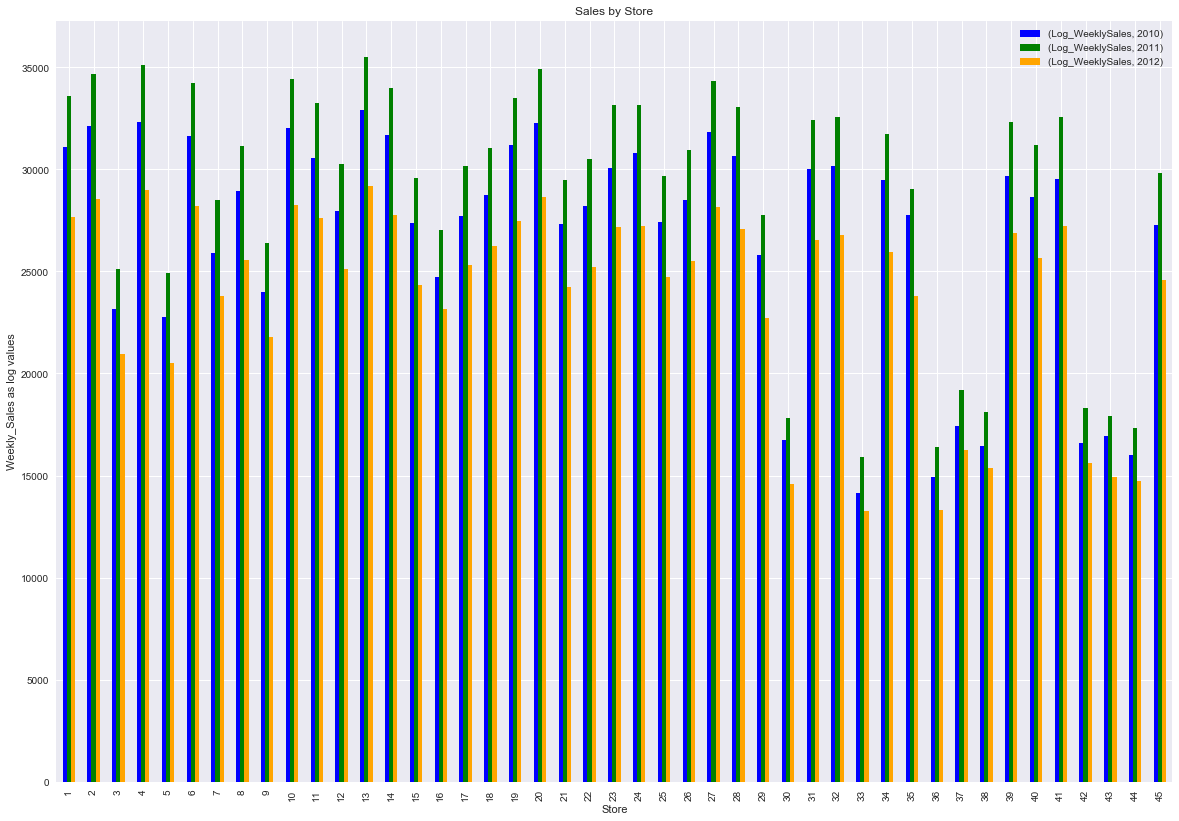

In [52]:
# Sales by store, for 3 years
str_sales.unstack(level=1).plot(kind='bar',figsize=(20,14),color=['blue','green','orange'])

plt.xlabel('Store')
plt.ylabel('Weekly_Sales as log values')
plt.title('Sales by Store')
plt.legend(loc=0)

#### Observation: 
### 1) Sales in 2011 is found to be having sales compared to 2010 and 2012.
### 2) Year 2012 has the lowest sales of the 3 years.
### 2) Stores 13, 4, 20 seem to be the top 3 in sales

In [53]:
## Include holiday flag in grouping data
str_sales_hol = train_new.groupby(['Store', 'Year', 'IsHoliday'])[['Log_WeeklySales']].sum()

In [54]:
str_sales_hol.head()

Log_WeeklySales
Store Year IsHoliday                 
1     2010 False         28499.947915
           True           2622.577884
      2011 False         30972.590846
           True           2644.488786
      2012 False         26377.137516

In [55]:
str_sales_hol.unstack(level=1).unstack(level=1).head()

Log_WeeklySales                                          \
Year                 2010                       2011                
IsHoliday           False        True          False        True    
Store                                                               
1            28499.947915  2622.577884  30972.590846  2644.488786   
2            29451.475531  2702.416961  31963.935746  2720.804233   
3            21213.200395  1964.415929  23142.245489  1973.065101   
4            29575.748895  2728.564975  32387.847561  2744.566995   
5            20823.299484  1949.825288  22942.816807  1973.345342   

                                      
Year               2012               
IsHoliday         False        True   
Store                                 
1          26377.137516  1313.023934  
2          27207.638877  1344.226577  
3          19987.649087   986.759973  
4          27642.790991  1359.725857  
5          19559.263306   963.142086

### Store sales by year - With ISHoliday flag

(1000, 35000)

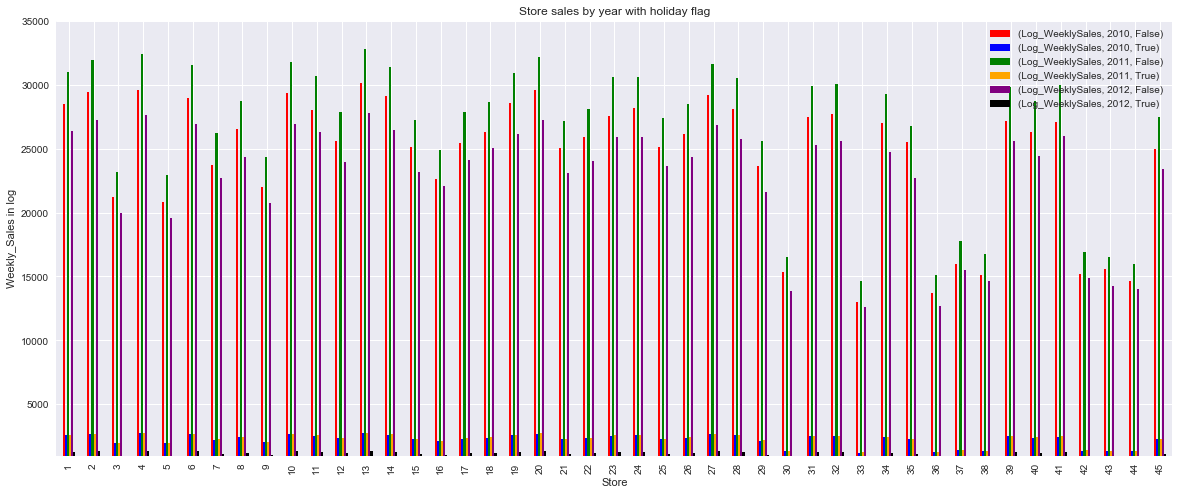

In [56]:
str_sales_hol.unstack(level=1).unstack(level=1).plot(kind='bar',figsize=(20,8),color=['red','blue','green','orange','purple','black'])
plt.ylabel('Weekly_Sales in log')
plt.title('Store sales by year with holiday flag')
plt.legend(loc=0)
plt.ylim(1000,35000)

#### Observation:
#### 1) Sales is seen to be VERY LOW during holidays, for all 3 years in observation


In [57]:
#Different ways to slice the multi index:

#str_sales.loc[([1,10], [2010,2012]),:]

In [58]:
#str_sales_month.loc[(slice(1), slice(1,12)),:]

In [59]:
#train_df.loc[0:5,'Log_WeeklySales']

In [60]:
#str_sales.loc[(slice(1),slice(2010)),'Log_WeeklySales']

In [61]:
#train_new.loc[((train_new['Store'])==1) ]#['Log_WeeklySales'] 
#(train_new['Log_WeeklySales'].loc[(train_new['Date'].dt.year) == 2010])

#plt.hist(np.log(train_new[(train_new['Store']==1) & (train_new['Date'].dt.year == 2010) ]['Log_WeeklySales'].sum()))

In [62]:
#Aggregate the data from the last year of the training set by store-department-month-IsHoliday, 
#taking the median as the aggregation function. 
#For each entry in the test set, predict the matching row from that table, or predict 0 if there isn't one

In [63]:
#train_new.groupby(['Store','Dept',month,'IsHoliday'])[['Log_WeeklySales']].median()

In [64]:
#str_sales.loc[(slice(1,5),slice(2010)),'Log_WeeklySales']

### Plot graph: Sales for Store 1, Year 2010

In [65]:
train_new[(train_new['Store']==1) & (train_new['Year']== 2010)][['Log_WeeklySales']].describe()

Log_WeeklySales
count      3443.000000
mean          9.039363
std           1.758623
min          -4.605170
25%           8.231159
50%           9.258961
75%          10.320209
max          12.189996

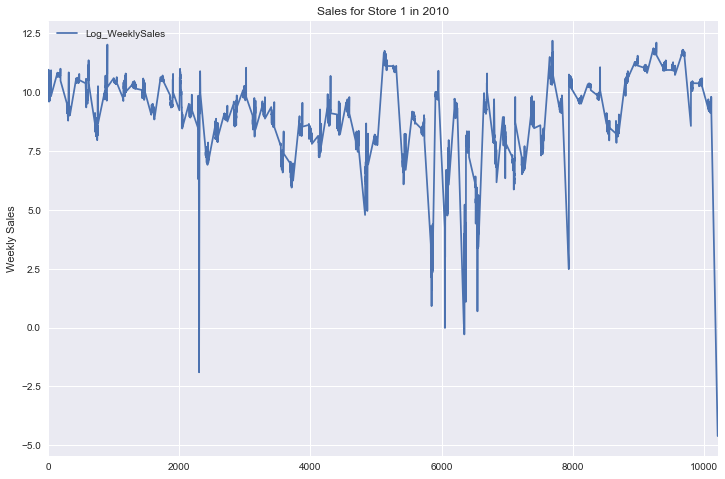

In [66]:
ax = train_new[(train_new['Store']==1) & (train_new['Year']== 2010)][['Log_WeeklySales']].plot(figsize=(12,8),title='Sales for Store 1 in 2010')
ax.set_ylabel('Weekly Sales')


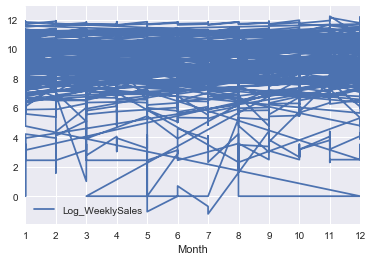

In [67]:
#### QUESTION: How is this plotted. Difference between HIST, BAR, LINE in the same plot
#train_new[(train_new['Store']==1) & (train_new['Year']== 2010) & (train_new['Month']== 2)][['Log_WeeklySales']]
#train_new[(train_new['Store']==1) & (train_new['Year']==2010) &(train_new['Month']==2)][['Log_WeeklySales']].plot()
train_new[(train_new['Store']==1) & (train_new['Year']==2011)].plot(kind='line',x='Month', y='Log_WeeklySales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))

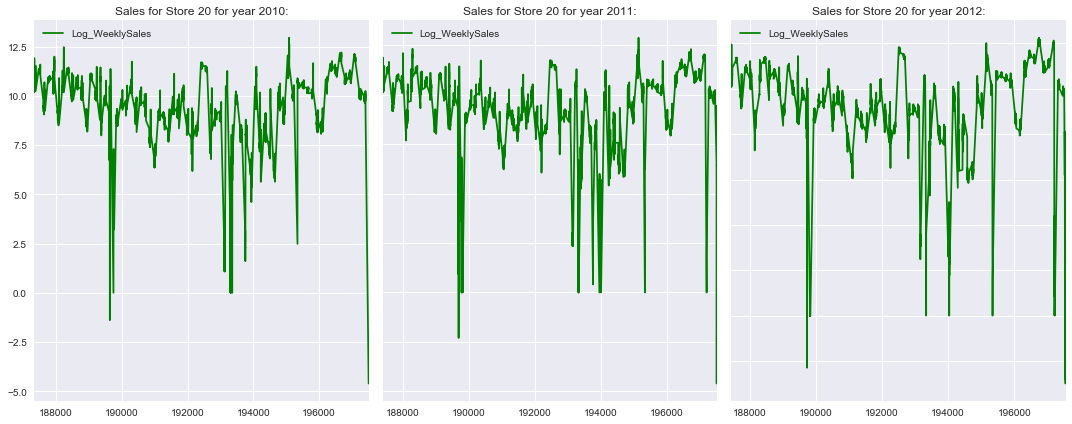

In [68]:
## Sales of Store 20 for 3 years
s=20
fig, ax = plt.subplots(1,3)
yr=2010
for c in range(0,3):
    train_new[(train_new['Store']==s) & (train_new['Year'] == yr)][['Log_WeeklySales']].plot(color='green',ax=ax[c],figsize=(15,6),sharey=True,title='Sales for Store %d for year %d:'% (s,yr))    
    yr += 1
plt.tight_layout()        

### Sales of 5 stores for 3 years

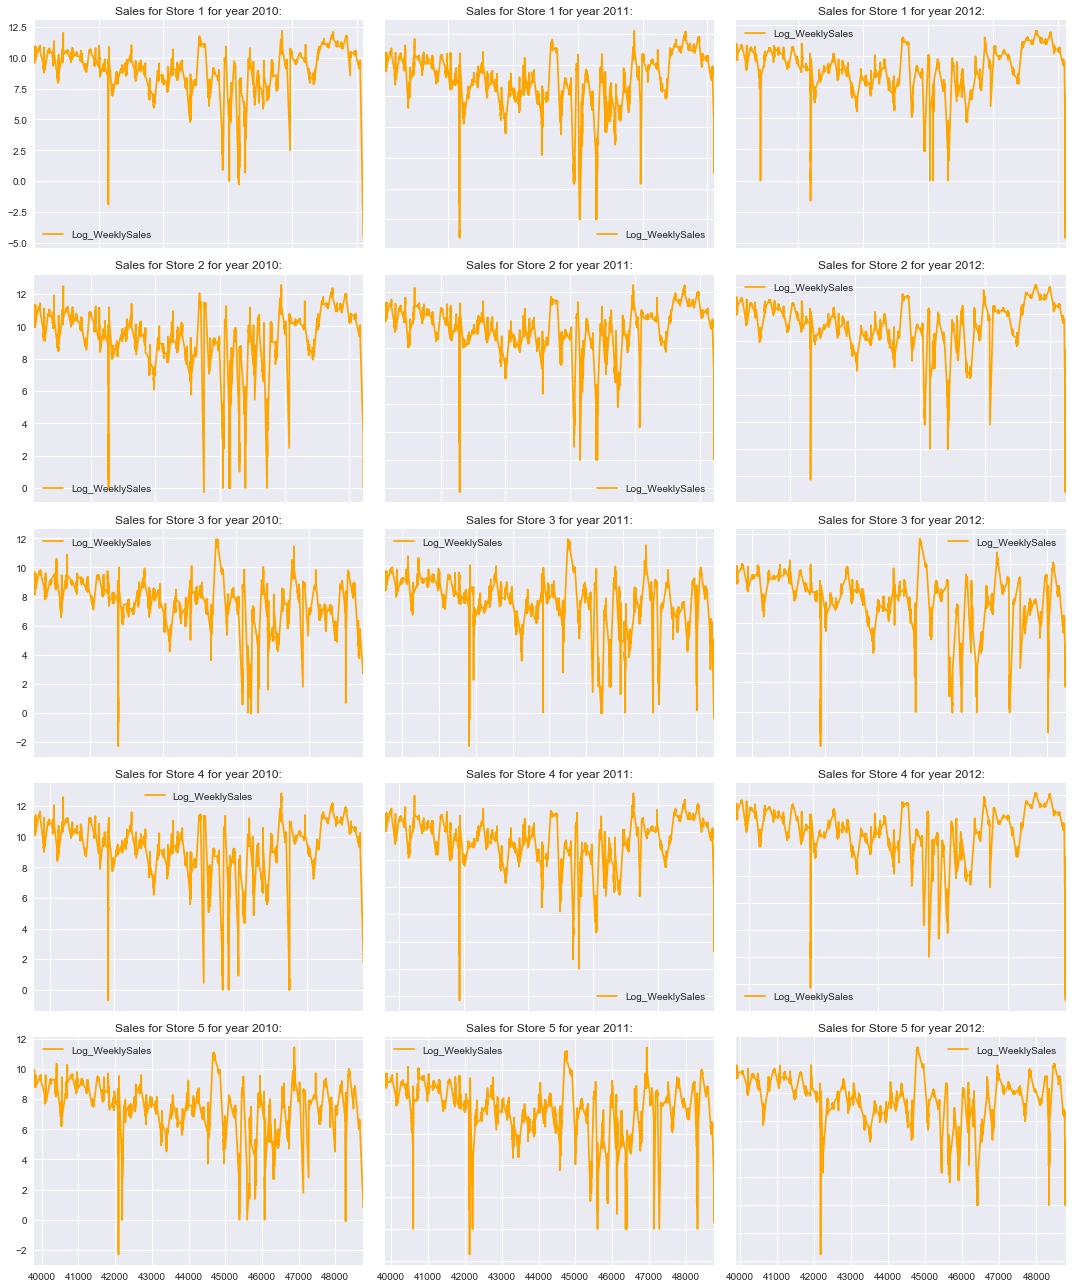

In [69]:
## Sales of 5 stores for 3 years
fig, ax = plt.subplots(5,3,figsize=(15,18))

s=1
for r in range(0,5):
    yr = 2010
    for c in range(0,3):
        train_new[(train_new['Store']==s) & (train_new['Year'] == yr)][['Log_WeeklySales']].plot(color='orange',sharex=True,sharey=True,ax=ax[r,c],title='Sales for Store %d for year %d:'%(s,yr))    
        yr += 1
    s += 1

plt.tight_layout()        

#### Observation of graphs above: Stores 3 and 5 did not do well. Their sales can be seen plunging down towards the end.

Empty DataFrame: No numeric data to plot for store 1 year 2010 month 1
Empty DataFrame: No numeric data to plot for store 1 year 2012 month 11
Empty DataFrame: No numeric data to plot for store 1 year 2012 month 12


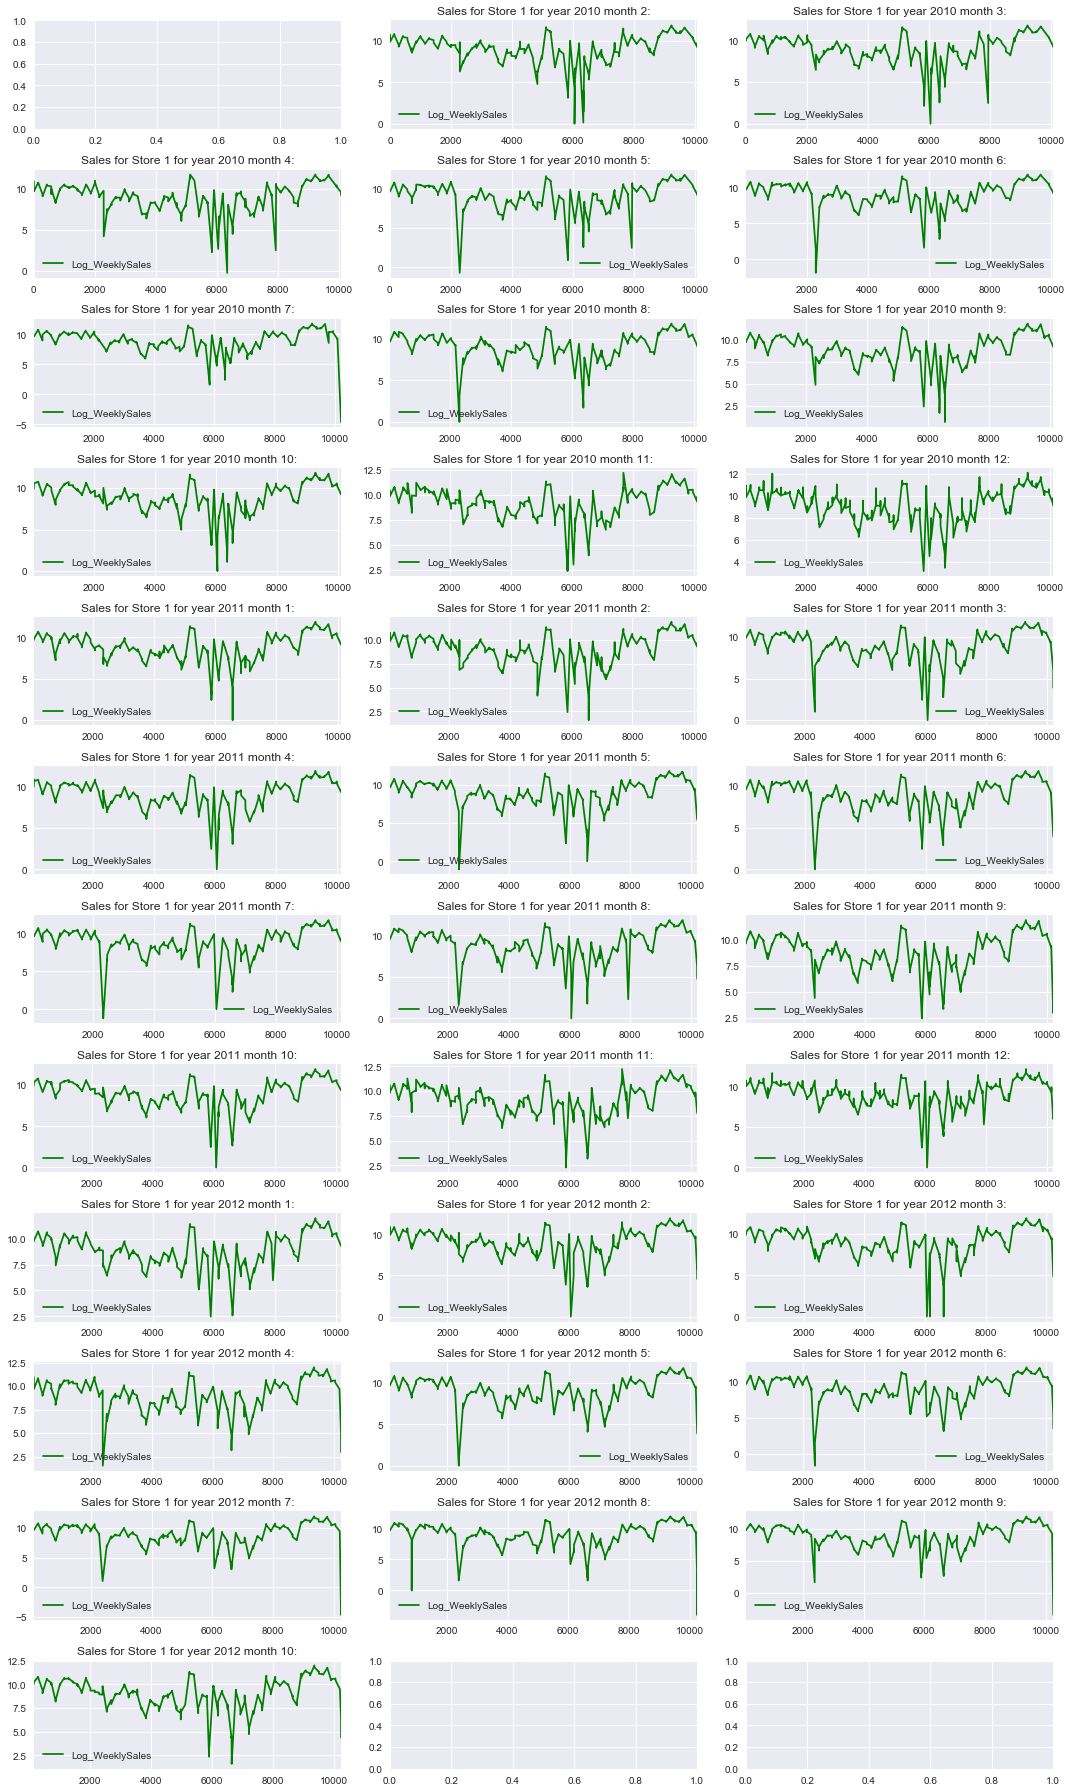

In [70]:
## Sales for Store 1 over 3 years - by month
fig, ax = plt.subplots(12,3, figsize=(15,25))
s = 1
yr = 2010
mon = 1
for r in range(0,12):
    for c in range(0,3):
        if (mon > 12):
                mon = 1
                yr += 1
        if (mon <= 12):
            try:
                train_new[(train_new['Store']==1) & (train_new['Year'] == yr) & (train_new['Month'] == mon)][['Log_WeeklySales']].plot(color='green',ax=ax[r,c],title='Sales for Store %d for year %d month %d:'% (s,yr,mon))    
            except TypeError:
                print("Empty DataFrame: No numeric data to plot for store %d year %d month %d"%(s,yr,mon))                
            mon += 1

                            
plt.tight_layout()            

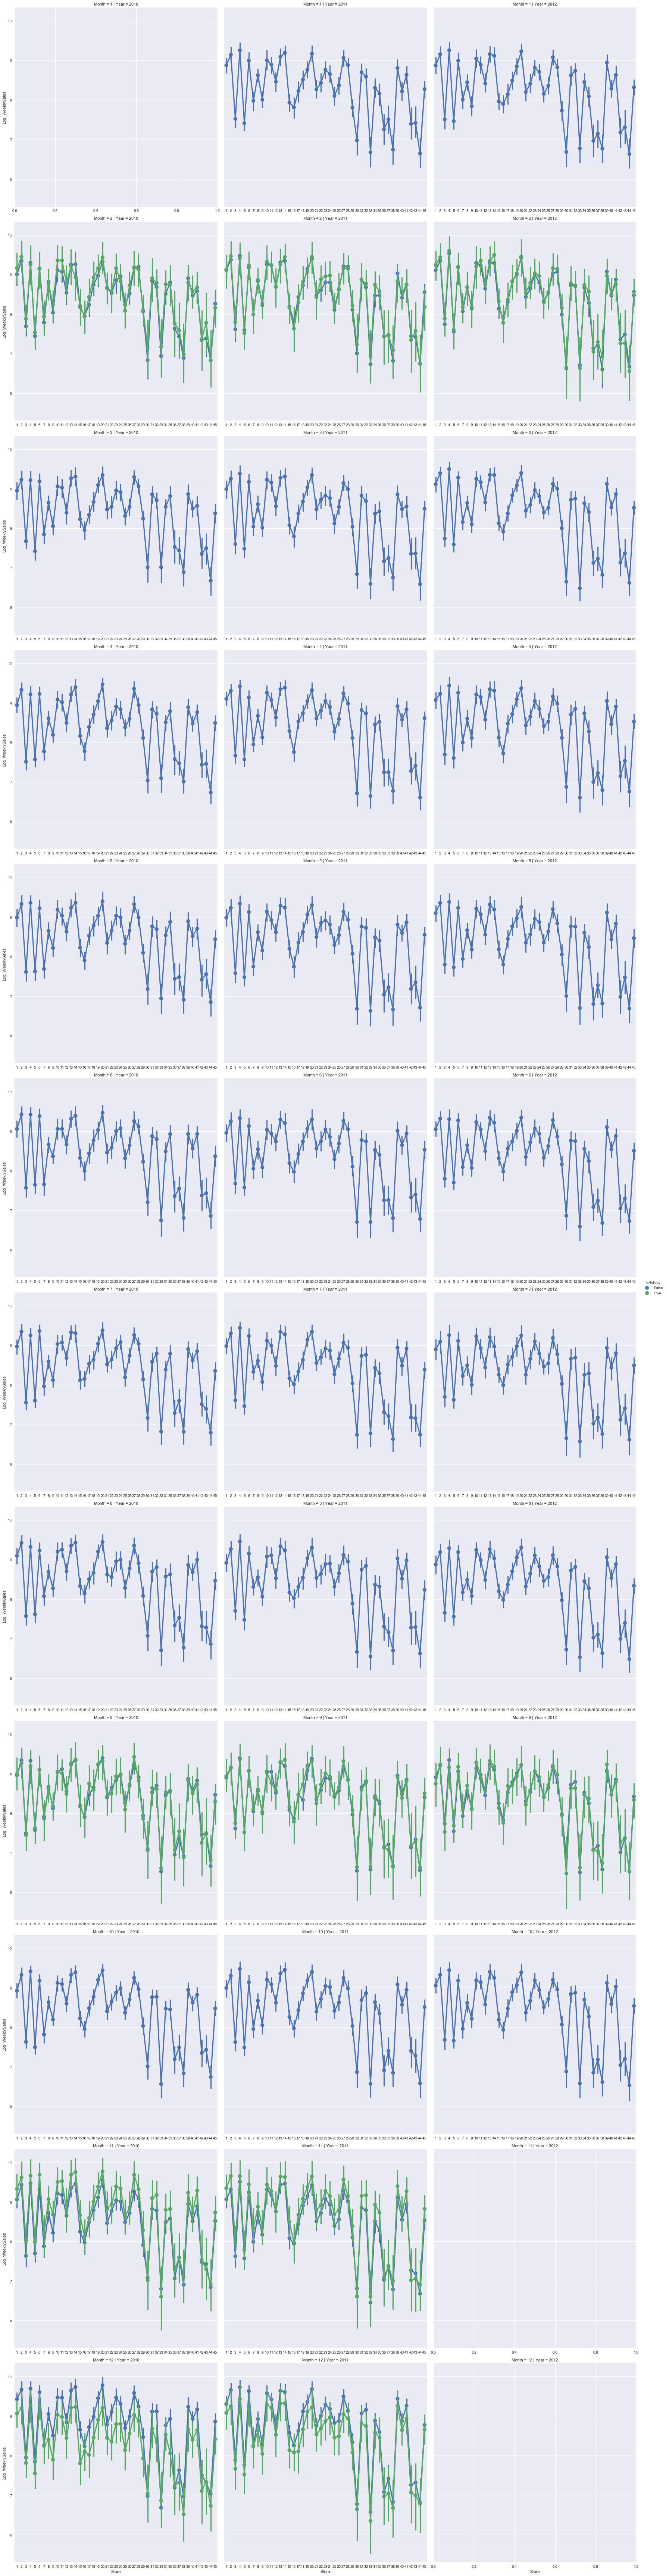

In [71]:
#Sales of Stores plotted by Year, Month with IsHoliday flag.

sns.factorplot(x='Store',y='Log_WeeklySales',data=train_new,col='Year',row='Month',hue='IsHoliday',size=8,sharex=False)


### Observation:
### 1. The holidays are only in Feb, Sep, Nov, Dec.
### 2. The Weekly Sales of all stores have a similar distribution for the same month in the 3 years under observation, 
### meaning the graph looks alike for a given month in differnt years.

In [72]:
train_new['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

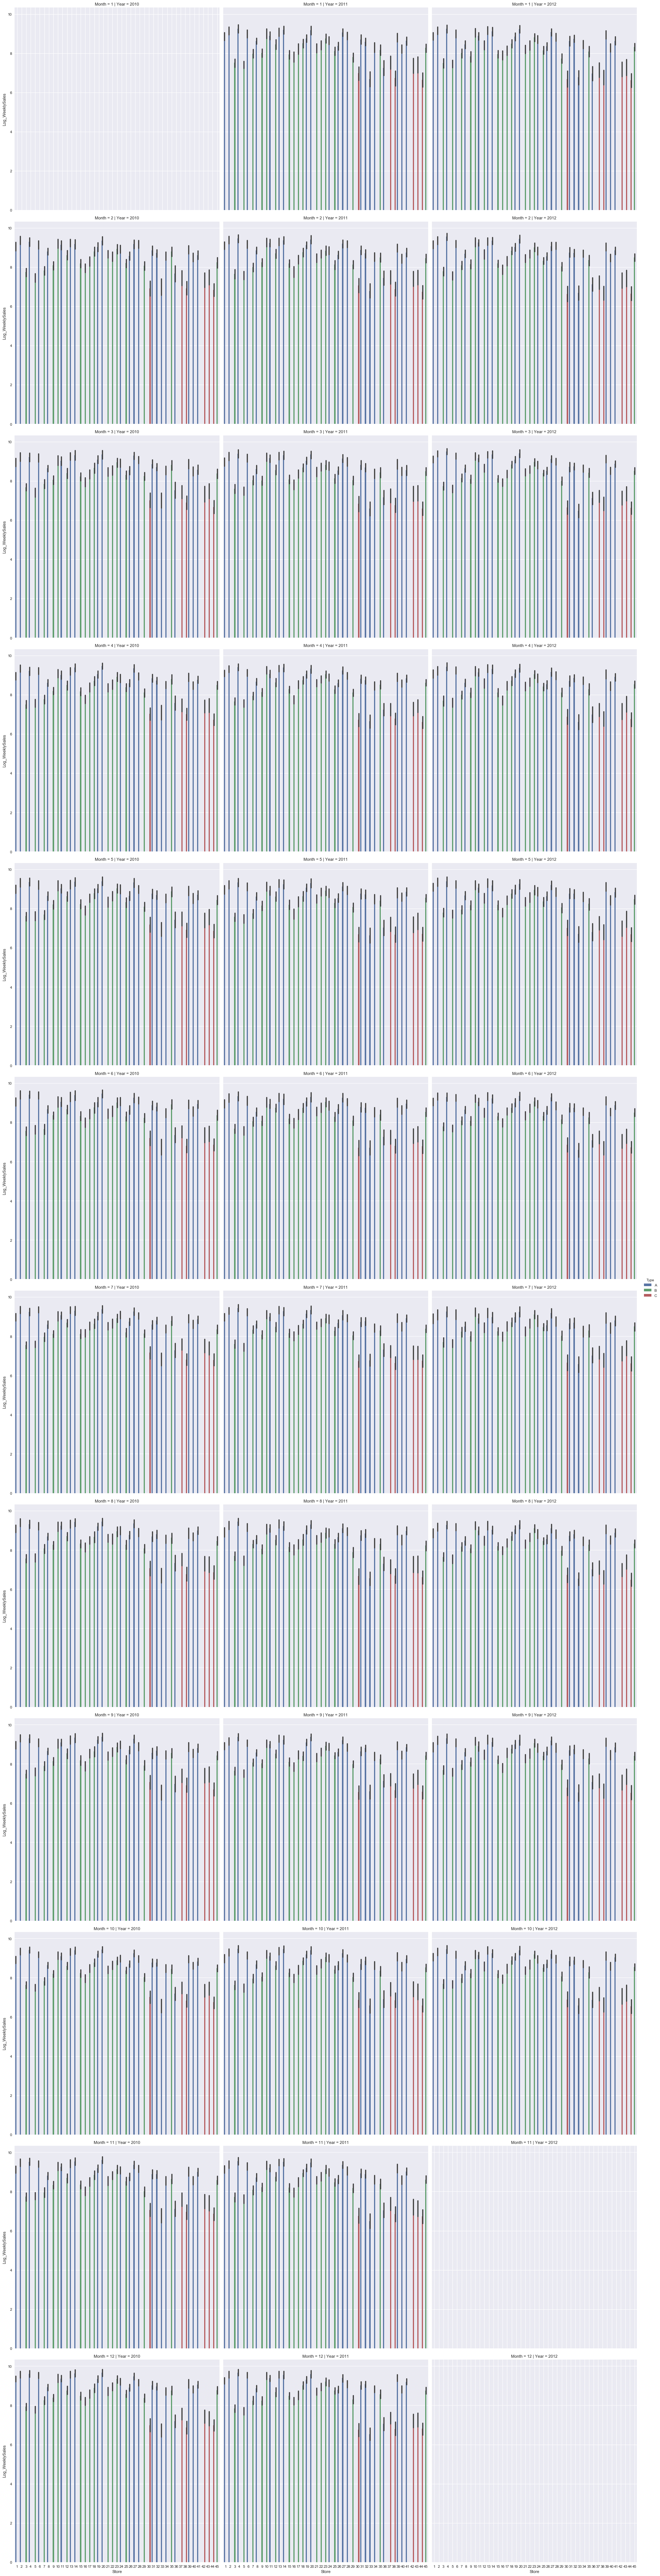

In [73]:
#Graph of all stores, by Year/Month and Type of Store:
sns.factorplot(x='Store',y='Log_WeeklySales',data=train_new,col='Year',row='Month',hue='Type',size=8,kind='bar')

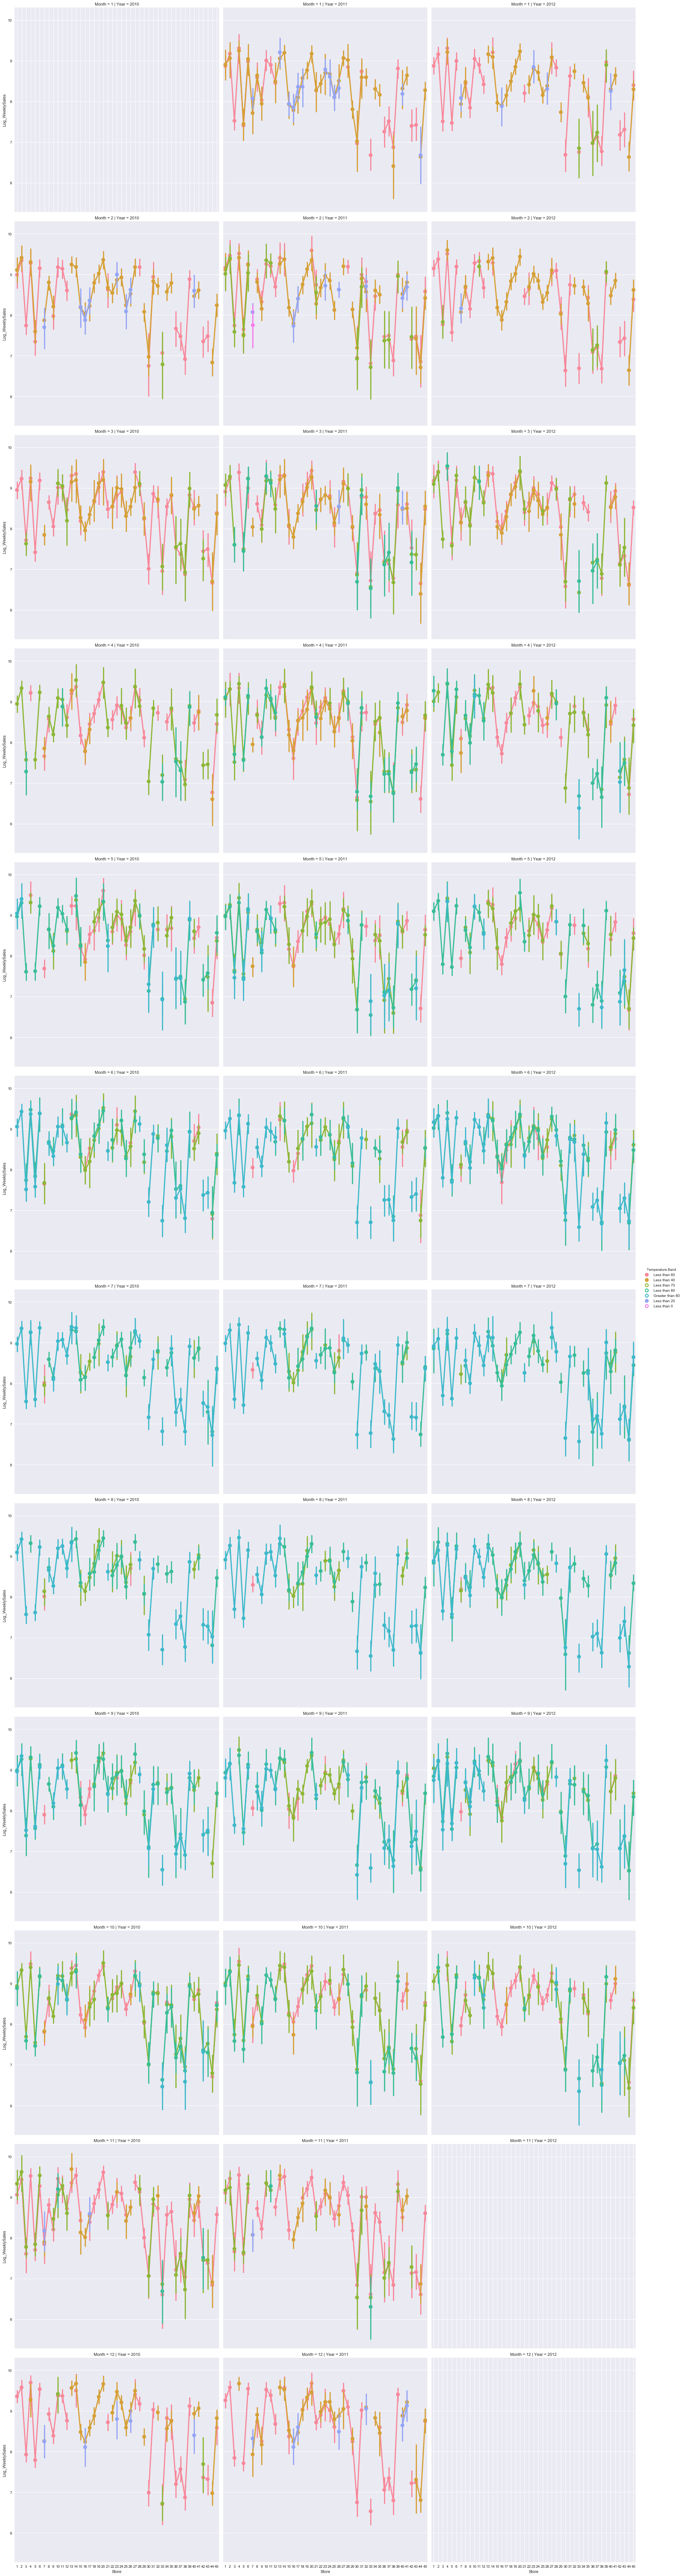

In [74]:
#Graph of all stores, by Year/Month and Temperature:
sns.factorplot(x='Store',y='Log_WeeklySales',data=train_new,col='Year',row='Month',hue='Temperature Band',size=8)

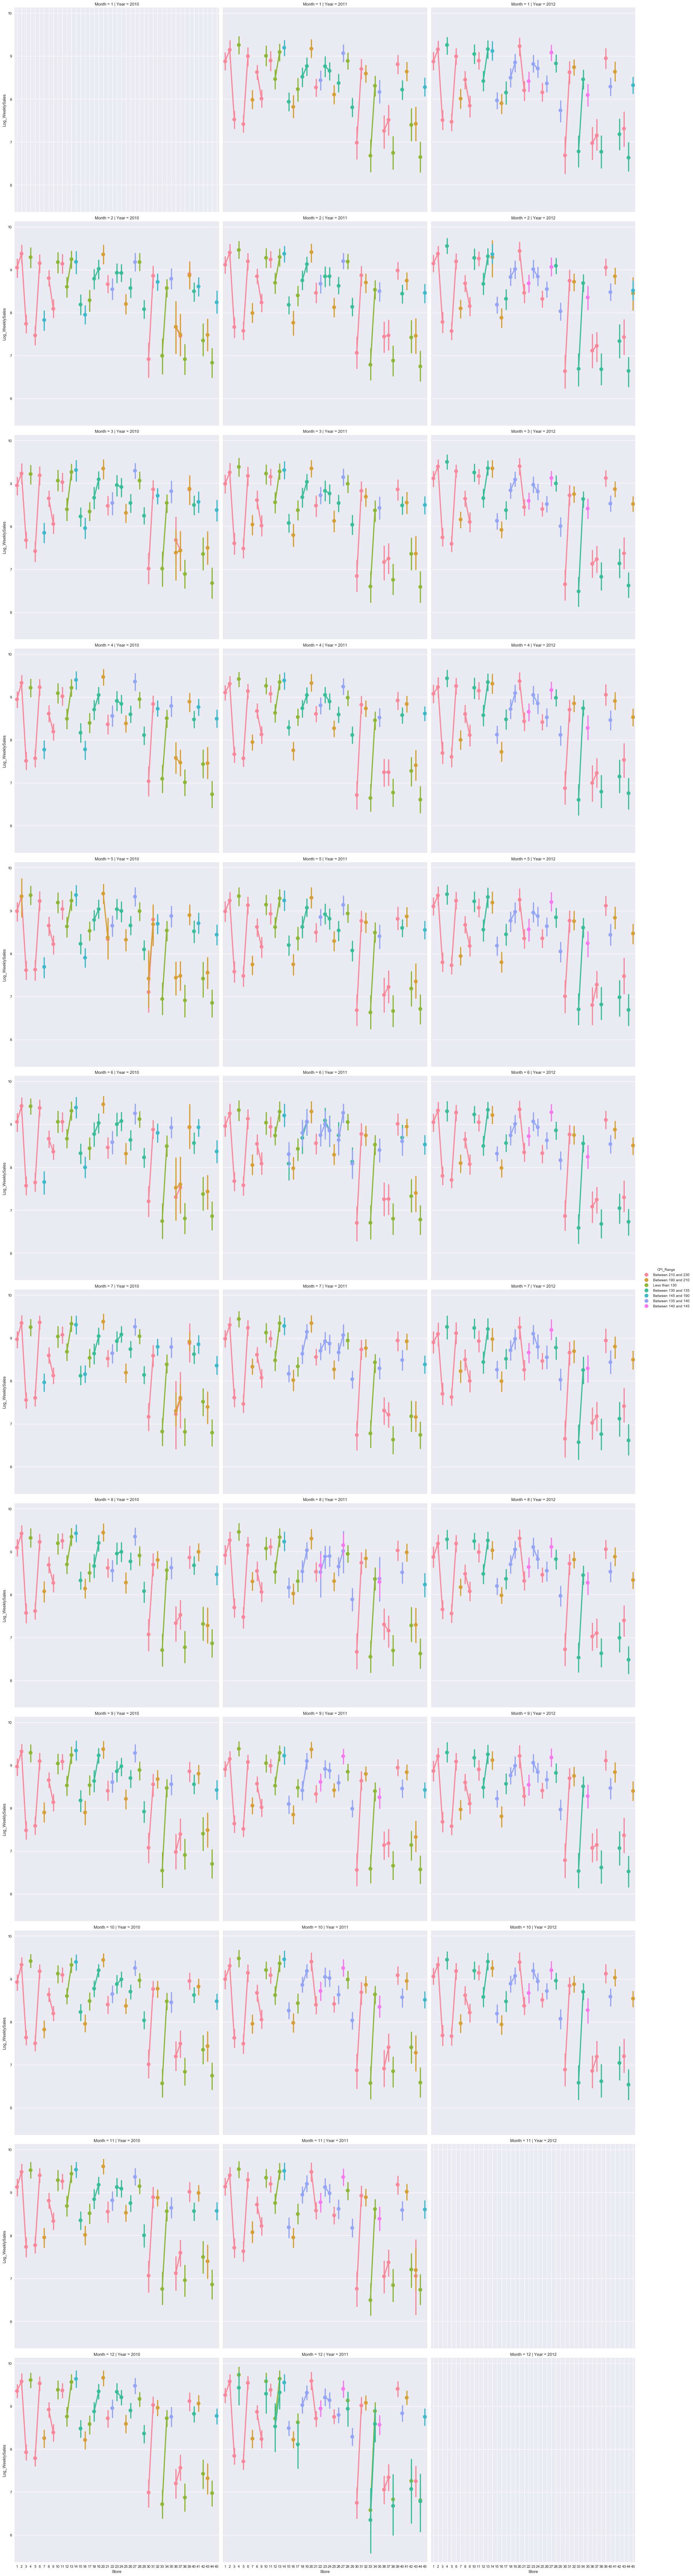

In [75]:
#Graph of all stores, by Year/Month and CPI range:
sns.factorplot(x='Store',y='Log_WeeklySales',data=train_new,col='Year',row='Month',hue='CPI_Range',size=8)

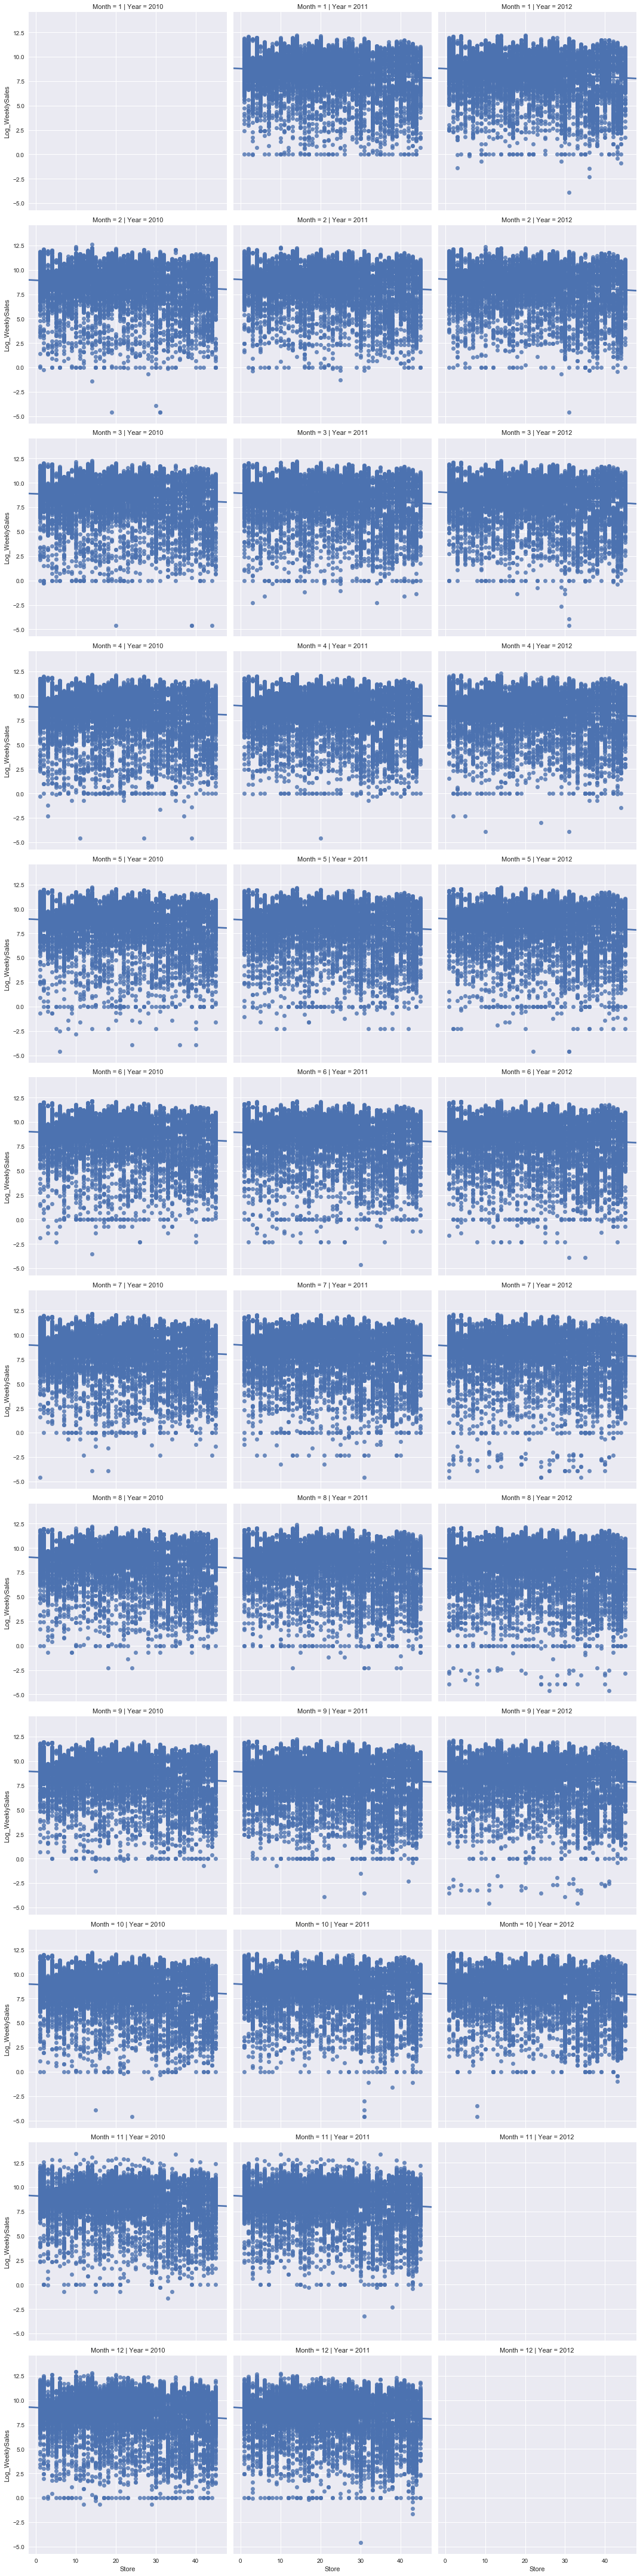

In [76]:
#LM Plot
sns.lmplot('Store','Log_WeeklySales',train_new,col='Year',row='Month')